In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid

In [79]:
dlc = dict(dlblue = '#0096ff', dlorange = '#FF9300', dldarkred='#C00000', dlmagenta='#FF40FF', dlpurple='#7030A0', dldarkblue =  '#0D5BDC')
dlblue = '#0096ff'; dlorange = '#FF9300'; dldarkred='#C00000'; dlmagenta='#FF40FF'; dlpurple='#7030A0'; dldarkblue =  '#0D5BDC'
dlcolors = [dlblue, dlorange, dldarkred, dlmagenta, dlpurple]

In [77]:
def plt_linear(X_train, Y_train, prediction_tf, prediction_np):
    fig, ax = plt.subplots(1,2, figsize=(16,4))
    ax[0].scatter(X_train, Y_train, marker='x', c='r', label="Data Points")
    ax[0].plot(X_train, prediction_tf,  c=dlc['dlblue'], label="model output")
    ax[0].text(1.6,350,r"y=$200 x + 100$", fontsize='xx-large', color=dlc['dlmagenta'])
    ax[0].legend(fontsize='xx-large')
    ax[0].set_ylabel('Price (in 1000s of dollars)', fontsize='xx-large')
    ax[0].set_xlabel('Size (1000 sqft)', fontsize='xx-large')
    ax[0].set_title("Tensorflow prediction",fontsize='xx-large')

    ax[1].scatter(X_train, Y_train, marker='x', c='r', label="Data Points")
    ax[1].plot(X_train, prediction_np,  c=dlc['dlblue'], label="model output")
    ax[1].text(1.6,350,r"y=$200 x + 100$", fontsize='xx-large', color=dlc['dlmagenta'])
    ax[1].legend(fontsize='xx-large')
    ax[1].set_ylabel('Price (in 1000s of dollars)', fontsize='xx-large')
    ax[1].set_xlabel('Size (1000 sqft)', fontsize='xx-large')
    ax[1].set_title("Numpy prediction",fontsize='xx-large')
    plt.show()

## Neuron without activation - Regression/Linear Model

### dataset
We'll use an example from Course 1, linear regression on house prices.

In [17]:
X_train=np.array([[1.0], [2.0]],dtype=np.float32)  #(size in 1000 square feet)
Y_train = np.array([[300.0], [500.0]], dtype=np.float32)       #(price in 1000s of dollars)

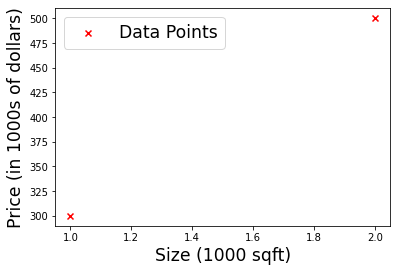

In [27]:
fig=plt.scatter(X_train,Y_train,marker='x', c='r', label="Data Points")
plt.legend( fontsize='xx-large')
_=plt.xlabel('Size (1000 sqft)',fontsize='xx-large')
_=plt.ylabel('Price (in 1000s of dollars)',fontsize='xx-large')
plt.show()

### Regression/Linear Model

The function implemented by a neuron with no activation is the same as in Course 1, linear regression.We can define a layer with one neuron or unit and compare it to the familiar linear regression function.

In [68]:
linear_layer=tf.keras.layers.Dense(units=1,activation='linear')
linear_layer.get_weights()

[]

There are no weights as the weights are not yet instantiated. Let's try the model on one example in X_train. This will trigger the instantiation of the weights. Note, the input to the layer must be 2-D, so we'll reshape it.

In [69]:
a1 =linear_layer(X_train)  #

In [70]:
print(a1)

tf.Tensor(
[[-0.65196824]
 [-1.3039365 ]], shape=(2, 1), dtype=float32)


In [71]:
w, b= linear_layer.get_weights()
print(f"w = {w}, b={b}")

w = [[-0.65196824]], b=[0.]


A linear regression model (1) with a single input feature will have a single weight and bias. This matches the dimensions of our linear_layer above.

The weights are initialized to random values so let's set them to some known values.

In [72]:
set_w=np.array([[200]]) #note the shape should be (1,1)
set_b=np.array([100])

linear_layer.set_weights([set_w,set_b])
print(linear_layer.get_weights())

[array([[200.]], dtype=float32), array([100.], dtype=float32)]


Let's compare equation (1) to the layer output.

In [75]:
np.dot(set_w,X_train[0].reshape(1,1))+set_b

array([[300.]])

In [ ]:
alin = np.dot(set_w,X_train[0].reshape(1,1)) + set_b
print(alin)

In [76]:
prediction_tf = linear_layer(X_train)
prediction_np = np.dot( X_train, set_w) + set_b

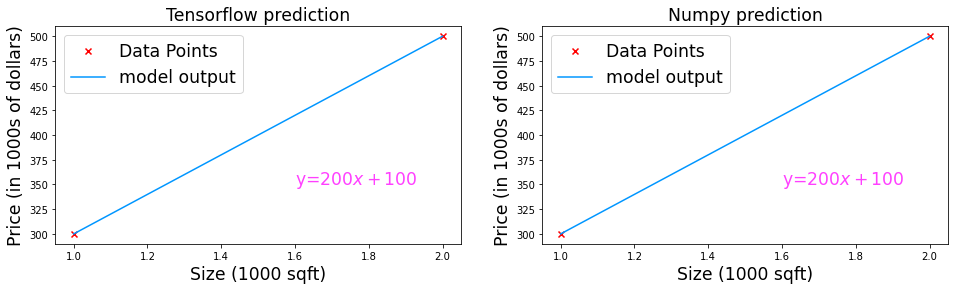

In [80]:
plt_linear(X_train, Y_train, prediction_tf, prediction_np)

## Neuron with Sigmoid activation
The function implemented by a neuron/unit with a sigmoid activation is the same as in Course 1, logistic regression

In [89]:
X_train=np.array([0,1,2,3,4,5],dtype=np.float32).reshape(-1,1)

In [90]:
Y_train=np.array([0,0,0,1,1,1],dtype=np.float32).reshape(-1,1)

In [91]:
pos = Y_train == 1
neg = Y_train == 0
X_train[pos]

array([3., 4., 5.], dtype=float32)

In [93]:
Y_train == 1

array([[False],
       [False],
       [False],
       [ True],
       [ True],
       [ True]])

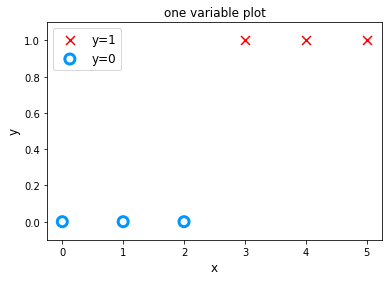

In [110]:
_=plt.scatter(X_train[pos],Y_train[pos],marker='x', s=80, c = 'red', label="y=1")
_=plt.scatter(X_train[neg], Y_train[neg], marker='o', s=100, label="y=0", facecolors='none', 
              edgecolors=dlc["dlblue"],lw=3)
_=plt.ylim(-0.1,1.1)
_=plt.legend(fontsize=12)
_=plt.ylabel('y', fontsize=12)
_=plt.xlabel('x', fontsize=12)
_=plt.title('one variable plot')
plt.show()

Logistic Neuron

We can implement a 'logistic neuron' by adding a sigmoid activation. The function of the neuron is then described by (2) above.
This section will create a Tensorflow Model that contains our logistic layer to demonstrate an alternate method of creating models. Tensorflow is most often used to create multi-layer models. The Sequential model is a convenient means of constructing these models.

In [115]:
model=Sequential(
[
    tf.keras.layers.Dense(units=1,input_dim=1,activation='sigmoid',name='L1')
]
)

model.summary() shows the layers and number of parameters in the model. There is only one layer in this model and that layer has only one unit. The unit has two parameters, 
w
 and 
b
.

In [116]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [117]:
logistic_layer=model.get_layer('L1')
w,b=logistic_layer.get_weights()
print(w,b)
print(w.shape,b.shape)

[[-0.65196824]] [0.]
(1, 1) (1,)


Let's set the weight and bias to some known values.

In [119]:
set_w=np.array([[2]])
set_b=np.array([-4.5])
# set_weights takes a list of numpy arrays
logistic_layer.set_weights([set_w,set_b])
print(logistic_layer.get_weights())

[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]


Let's compare equation (2) to the layer output.

In [120]:
def sigmoidnp(z):
    """
    Compute the sigmoid of z

    Parameters
    ----------
    z : array_like
        A scalar or numpy array of any size.

    Returns
    -------
     g : array_like
         sigmoid(z)
    """
    z = np.clip( z, -500, 500 )           # protect against overflow
    g = 1.0/(1.0+np.exp(-z))

    return g

In [121]:
a1=model.predict(X_train[0].reshape(1,1))
print(a1)
alog=sigmoidnp(np.dot(set_w,X_train[0].reshape(1,1))+set_b)
print(alog)

2022-07-14 18:51:15.314877: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-07-14 18:51:16.008612: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 986ms/step
[[0.01098694]]
[[0.01098694]]


They produce the same values! Now, we can use our logistic layer and NumPy model to make predictions on our training data.

Congratulations!

You built a very simple neural network and have explored the similarities of a neuron to the linear and logistic regression from Course 1.